### Tối ưu hàm Rosenbrock
Đầu vào:
- Hàm Rosenbrock: $f_x = \sum_{i = 1}^{D - 1}{[100(x_{i + 1} - x_i^2)^2 + (1 - x_i)^2]}$
- Số chiều: D
- $x_i \in [lower, upper]$ với $i = [1...D]$

Đầu ra: 
- Một lời giải $x = (x_1, x_2, ..., x_D)$
- Giá trị nhỏ nhất $f_x$

In [ ]:
import numpy as np # type: ignore
def Rosenbrock(x):
    return np.sum(100 * (x[1:] - np.square(x[:-1]))**2 + (1 - np.square(x[:-1])))

In [14]:
import numpy as np # type: ignore
import random
import copy
import matplotlib.pyplot as plt # type: ignore

In [15]:
class Problem:
    def __init__(self, D, LB, UB):
        self.D = D
        self.LB = LB
        self.UB = UB

In [16]:
def decode(x_en, problem: Problem):
    x = x_en * (problem.UB - problem.LB) + problem.LB
    return x

def get_fitness(x):
    # fx = np.sum(x**2)
    fx = np.sum(100 * (x[1:] - np.square(x[:-1]))**2 + (1 - np.square(x[:-1])))
    return -fx

In [17]:
class Individual:
    def __init__(self):
        self.chromosome = None
        self.fitness = None

    def genIndi(self, problem : Problem):
        self.chromosome = np.random.uniform(0.0, 1.0, problem.D)
    
    def cal_fitness(self, problem):
        sol = decode(self.chromosome, problem)
        self.fitness = get_fitness(sol)

    def clone(self):
        return copy.deepcopy(self)
    
    def __repr__(self):
        return f"chromosome={self.chromosome}, fitness={self.fitness:.2f})"

In [18]:
# Simulated binary crossover - SBX
def crossover(parent1, parent2, problem : Problem, eta = 2.0):
    off1 = Individual()
    off2 = Individual()
    r = np.random.rand()
    if (r <= 0.5):
        beta = (2*r)**(1.0/(eta + 1))
    else:
        beta = (1.0/(2*(1 - r)))**(1.0/(eta + 1))
    p1 = parent1.chromosome
    p2 = parent2.chromosome
    c1 = 0.5 * ((1 + beta) * p1 + (1 - beta) * p2)
    c2 = 0.5 * ((1 - beta) * p1 + (1 + beta) * p2)
    c1 = np.clip(c1, 0.0, 1.0)
    c2 = np.clip(c2, 0.0, 1.0)
    off1.chromosome = c1
    off2.chromosome = c2
    return off1.clone(), off2.clone()


In [19]:

# Polynomial mutaion - PM
def mutation(indi : Individual, eta = 20.0):
    chr = indi.chromosome
    for i in range(chr.size):
        mu = np.random.rand()
        if (mu <= 0.5):
            delta = (2 * mu)**(1.0/(1 + eta)) - 1
            chr[i] = chr[i] + delta * chr[i]
        else:
            delta = 1 - (2 - 2*mu)**(1.0/(1 + eta))
            chr[i] = chr[i] + delta * (1 - chr[i])
            
    chr = np.clip(chr, 0.0, 1.0)
    indi.chromosome = chr
    return indi.clone()

In [20]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.list_indi = []
        self.problem = problem
    
    def genPop(self):
        for i in range(self.pop_size):
            indi = Individual()
            indi.genIndi(self.problem)
            indi.cal_fitness(self.problem)
            self.list_indi.append(indi)

In [21]:
def selection(list, k = 2):
    tour1 = random.sample(list, k)
    tour2 = random.sample(list, k)
    x = max(tour1, key=lambda indi: indi.fitness)
    y = max(tour2, key=lambda indi: indi.fitness)
    return x.clone(), y.clone() 

In [22]:
def survival_selection(list, pop_size):
    list = sorted(list, key=lambda indi: indi.fitness, reverse=True)
    list = list[0: pop_size]
    return list

In [23]:
def GA(problem, pop_size, max_gen, p_c, p_m):
    pop = Population(pop_size, problem)
    pop.genPop()
    history = []
    for i in range(max_gen):
        child = []
        while (len(child) < pop_size):
            p1, p2 = selection(pop.list_indi)
            if np.random.rand() <= p_c:
                c1, c2 = crossover(p1, p2, problem)
                c1.cal_fitness(problem)
                c2.cal_fitness(problem)
                child.append(c1)
                child.append(c2)
            if np.random.rand() <= p_m:
                p1 = mutation(p1)
                p2 = mutation(p2)
                p1.cal_fitness(problem)
                p2.cal_fitness(problem)
                child.append(p1)
                child.append(p2)
        pop.list_indi = survival_selection(pop.list_indi + child, pop_size)
        history.append(pop.list_indi[0].fitness)
    solution = pop.list_indi[0]
    return history, solution


In [24]:
# setup
D = 10
LB = -50
UB = 50
problem = Problem(D, LB, UB)

pop_size = 200
max_gen = 500
Pc = 0.9
Pm = 0.2

# start
fitness_history, solution = GA(problem, pop_size, max_gen, Pc, Pm)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, best fitness = {fitness_history[i]:.2f}")

Generation 0, best fitness = -55243139.19
Generation 1, best fitness = -27082004.68
Generation 2, best fitness = -27082004.68
Generation 3, best fitness = -18059855.61
Generation 4, best fitness = -10722435.10
Generation 5, best fitness = -1602550.80
Generation 6, best fitness = -1602550.80
Generation 7, best fitness = -846661.47
Generation 8, best fitness = -730229.11
Generation 9, best fitness = -537907.64
Generation 10, best fitness = -329684.16
Generation 11, best fitness = -282217.02
Generation 12, best fitness = -158758.18
Generation 13, best fitness = -139058.95
Generation 14, best fitness = -42194.27
Generation 15, best fitness = -41921.09
Generation 16, best fitness = -41921.09
Generation 17, best fitness = -37777.37
Generation 18, best fitness = -23724.65
Generation 19, best fitness = -23442.31
Generation 20, best fitness = -18551.73
Generation 21, best fitness = -17109.82
Generation 22, best fitness = -15875.56
Generation 23, best fitness = -14461.53
Generation 24, best fitn

In [25]:
np.set_printoptions(precision=2, suppress=True)
print("solution:")
print(decode(solution.chromosome, problem))
print(f"The Rosenbrock value is: {- solution.fitness:.2f}")

solution:
[ 0.21 -0.89  0.44 -0.65  0.78 -0.1  -0.4  -0.6   2.82  8.4 ]
The Rosenbrock value is: 931.43


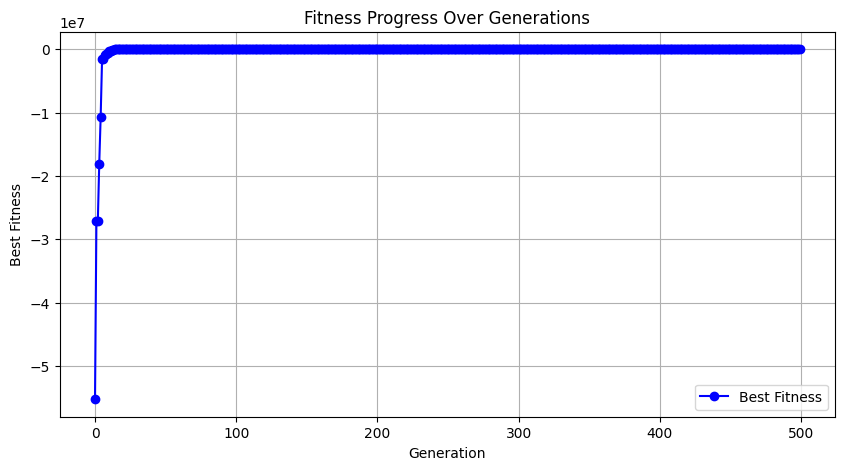

In [26]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()